In [7]:
#!/usr/bin/env python3
"""This file creates toy samples of ellipticities and saves them to .hdf5 file."""
import os
from functools import partial
from typing import Callable

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


import blackjax
import click
import jax
import jax.numpy as jnp
import jax.scipy as jsp
from jax import jit as jjit
from jax import random, vmap
from jax.typing import ArrayLike
from jax import random

from bpd import DATA_DIR
from bpd.chains import inference_loop
from bpd.io import save_dataset
from bpd.prior import ellip_mag_prior, sample_synthetic_sheared_ellips_unclipped

import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)



In [8]:
from bpd.pipelines.toy_ellips import pipeline_toy_ellips_samples

In [9]:
SEED = 51
key = random.key(SEED)

In [108]:
g1 = 0.02
g2 = 0.0
sigma_e = 1e-3
sigma_e_int=1e-2
sigma_m=1e-4
n_samples=10
k=1000

In [109]:
e_post, e_obs, e_sheared = pipeline_toy_ellips_samples(key, g1, g2, sigma_e, sigma_e_int, sigma_m, n_samples=10, k=k)


In [110]:
e_post.shape, e_obs.shape

((10, 1000, 2), (10, 2))

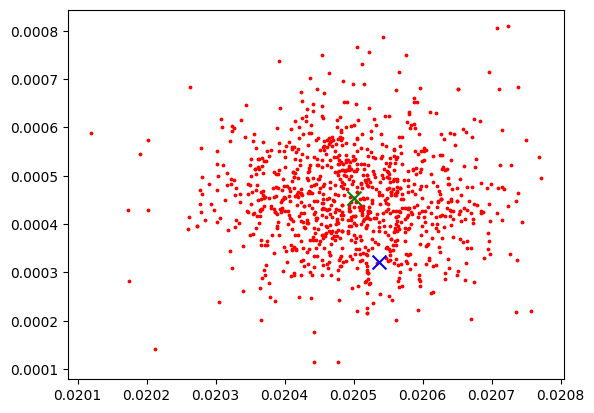

In [111]:
idx =8
plt.scatter(e_post[idx, :, 0], e_post[idx, :, 1], s=3, color='r')
plt.scatter(e_obs[idx, 0], e_obs[idx, 1], s=100, color='g', marker='x')
plt.scatter(e_sheared[idx, 0], e_sheared[idx, 1], s=100, color='b', marker='x')